In [9]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import time
from dnn_utils import *

In [2]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It's a non-cat picture.


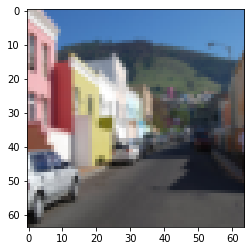

In [3]:
# Example image
index= 1
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [4]:
m = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
num_py = train_x_orig.shape[2]
num_pz = train_x_orig.shape[3]

train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T
train_x = train_x_flatten / 255.
test_x = test_x_flatten / 255.

print("train_x.shape: " + str(train_x.shape))
print("test_x.shape: " + str(test_x.shape))


train_x.shape: (12288, 209)
test_x.shape: (12288, 50)


In [6]:
n_x = train_x.shape[0]
n_h = 7
n_y = 1
dims_two_layer = (n_x, n_h, n_y)

## Two-Layer NN

Cost after iteration 0: 0.6925711299846448
Cost after iteration 100: 0.6476585687071462
Cost after iteration 200: 0.6357714913390251
Cost after iteration 300: 0.6078780848094335
Cost after iteration 400: 0.5660270810695369
Cost after iteration 500: 0.5217634723659154
Cost after iteration 600: 0.48178285162246437
Cost after iteration 700: 0.4510214703287075
Cost after iteration 800: 0.42016544683251317
Cost after iteration 900: 0.38272366433516825
Cost after iteration 1000: 0.36567156419833946
Cost after iteration 1100: 0.3433905534916755
Cost after iteration 1200: 0.34812317625095424
Cost after iteration 1300: 0.30935446281908524
Cost after iteration 1400: 0.27632657850511183
Cost after iteration 1500: 0.2604472473190575
Cost after iteration 1600: 0.24669080421981182
Cost after iteration 1700: 0.24721429102609968
Cost after iteration 1800: 0.23377170030324076
Cost after iteration 1900: 0.20665545856953443
Cost after iteration 2000: 0.19849868202008292
Cost after iteration 2100: 0.18666

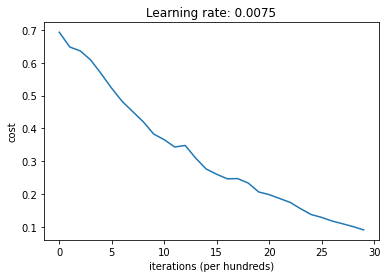

In [11]:
start = time.time()
parameters_two = two_layer_model(train_x, train_y, layer_dims=dims_two_layer, print_cost=True)
end = time.time()
print("\nTotal training time: " + str(end - start) + "sec")

## L-Layer NN

Cost after iteration 0: 0.6857658640688642
Cost after iteration 100: 0.6268283206796746
Cost after iteration 200: 0.585779145265414
Cost after iteration 300: 0.523618388980637
Cost after iteration 400: 0.44463969165526906
Cost after iteration 500: 0.3982705296491919
Cost after iteration 600: 0.3617620176139942
Cost after iteration 700: 0.3017521208145245
Cost after iteration 800: 0.26074551548073704
Cost after iteration 900: 0.17370099480927625
Cost after iteration 1000: 0.08548702147628882
Cost after iteration 1100: 0.050876467040306794
Cost after iteration 1200: 0.03629076966650977
Cost after iteration 1300: 0.027893590390702414
Cost after iteration 1400: 0.022020174042180894
Cost after iteration 1500: 0.01819121258309866
Cost after iteration 1600: 0.01539384194251272
Cost after iteration 1700: 0.011902981087004714
Cost after iteration 1800: 0.009932773347640051
Cost after iteration 1900: 0.008531933856573984
Cost after iteration 2000: 0.0074641476709673815
Cost after iteration 2100:

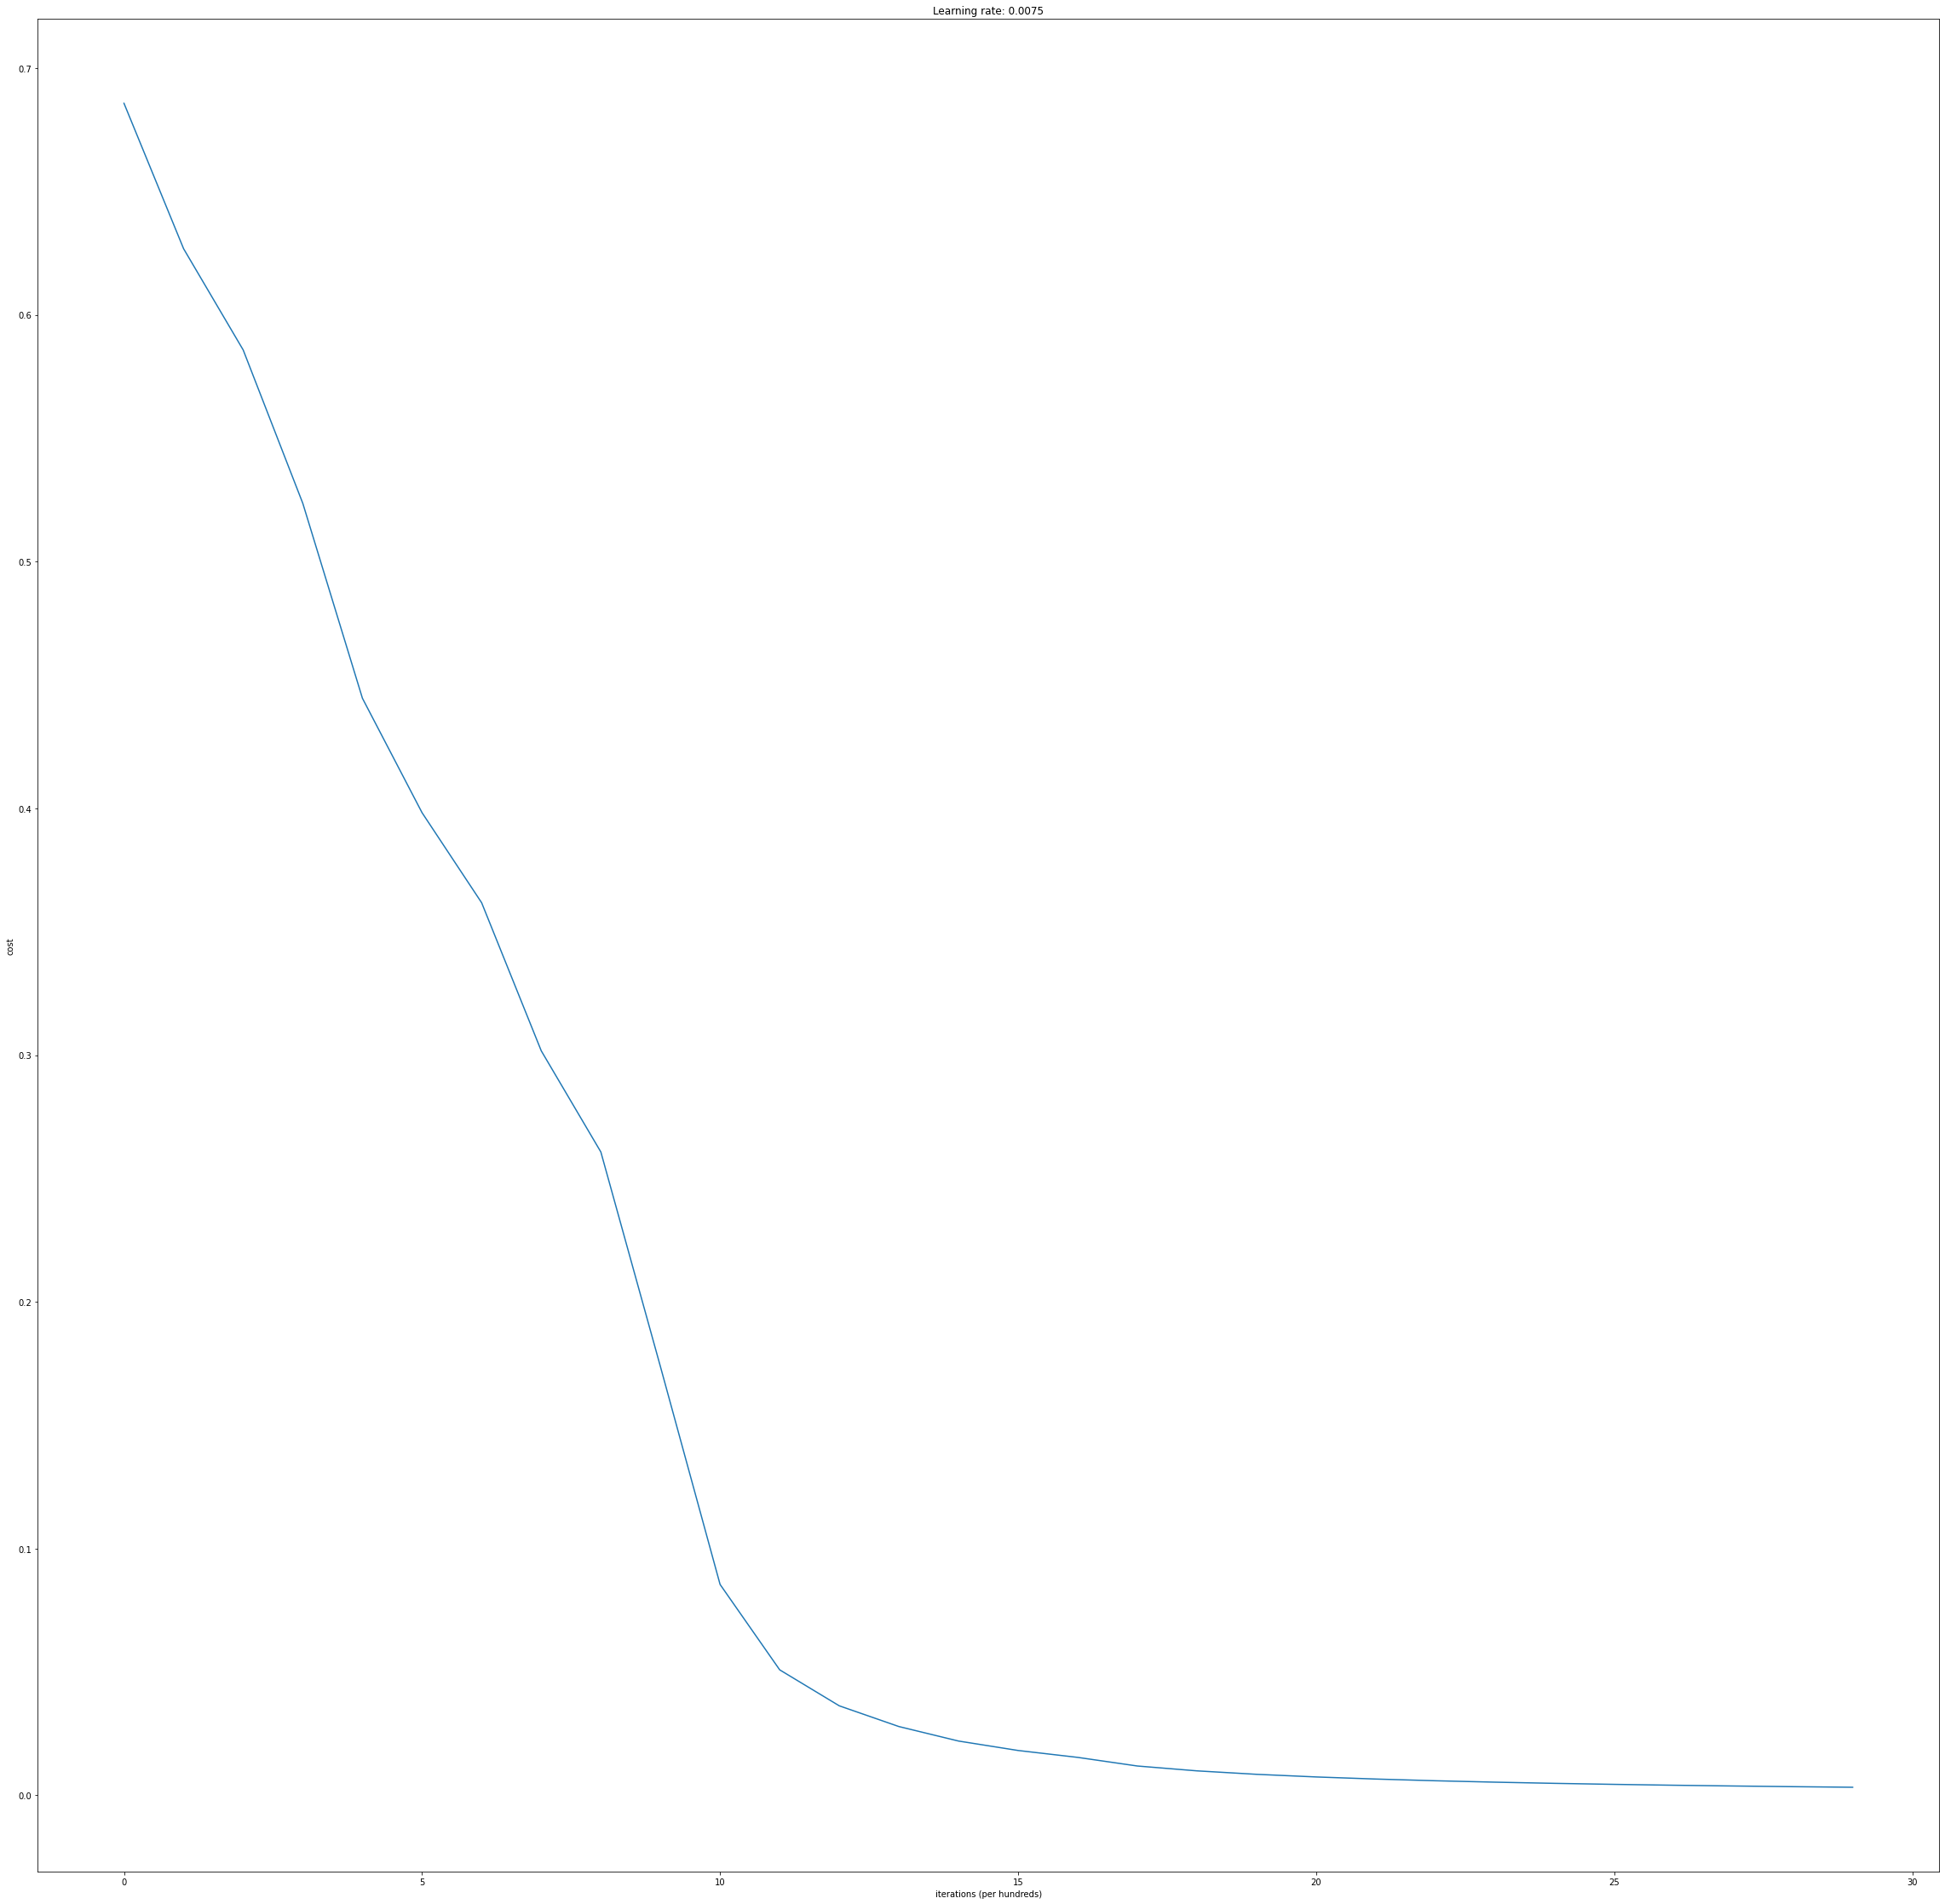

In [24]:
dims_l_layer= [n_x, 20, 7, 5, 1]
start = time.time()
parameters_L = L_layer_model(train_x, train_y, layers_dims=dims_l_layer, print_cost=True)
end= time.time()
print("\nTotal training time: " + str(end - start) + "sec")

## Results
### Two-layer NN

In [25]:
predictions_train_two = predict(train_x, train_y, parameters_two)
predictions_test_two = predict(test_x, test_y, parameters_two)

Accuracy: 0.9712918660287081
Accuracy: 0.68


### four-layer NN

In [26]:
predictions_train_L = predict(train_x, train_y, parameters_L)
predictions_test_L = predict(test_x, test_y, parameters_L)

Accuracy: 1.0
Accuracy: 0.76


### mislabeled images

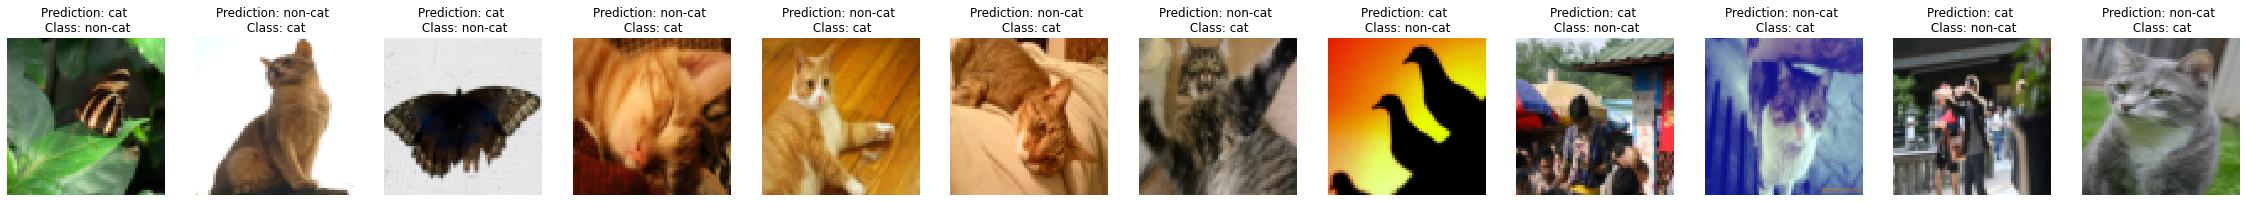

In [27]:
print_mislabeled_images(classes, test_x, test_y, predictions_test_L)